In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as seabornInstance 
from sklearn import metrics

In [19]:
df = pd.read_csv(r'C19 P1.csv')
df = df.dropna()

In [20]:
print(df)

    day      date  new_cases_malaysia  total_cases_malaysia  \
0     1  24-01-20                   0                     0   
1     2  25-01-20                   4                     4   
2     3  26-01-20                   0                     4   
3     4  27-01-20                   0                     4   
4     5  28-01-20                   3                     7   
5     6  29-01-20                   0                     7   
6     7  30-01-20                   1                     8   
7     8  31-01-20                   0                     8   
8     9  01-02-20                   0                     8   
9    10  02-02-20                   0                     8   
10   11  03-02-20                   0                     8   
11   12  04-02-20                   2                    10   
12   13  05-02-20                   2                    12   
13   14  06-02-20                   2                    14   
14   15  07-02-20                   1                  

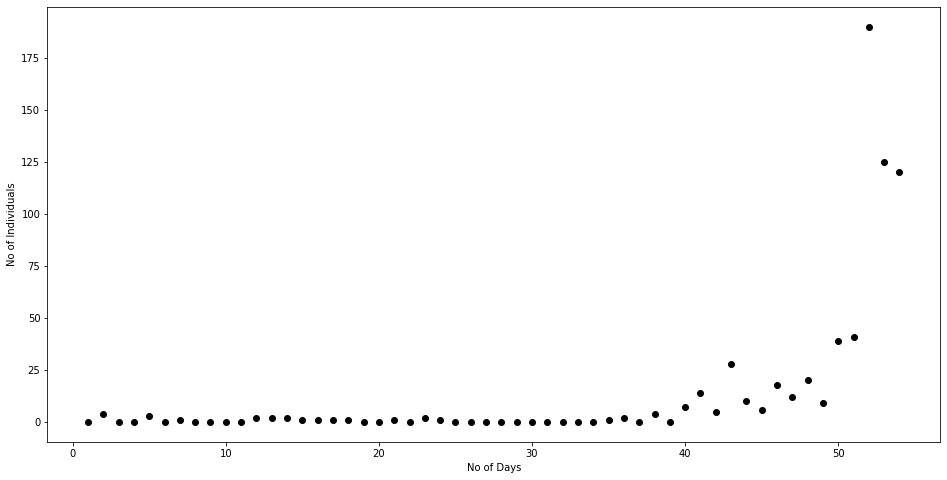

In [30]:
plt.figure(figsize=(16,8))
plt.scatter(
    df['day'],
    df['new_cases_malaysia'],
    c='black'
)

plt.xlabel("No of Days")
plt.ylabel("No of Individuals")
plt.show()

In [31]:

X = df['day'].values.reshape(-1,1)
Y = df['new_cases_malaysia'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X,Y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = -18.593 + 1.1293X


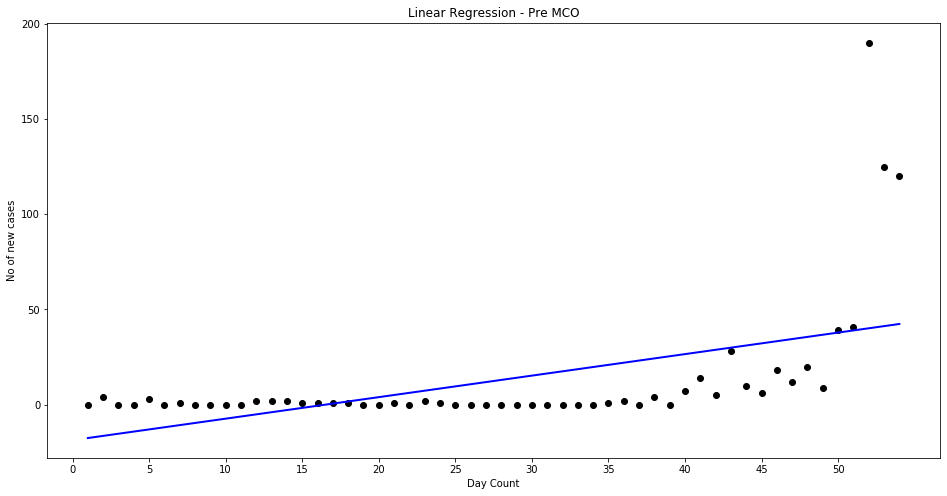

In [32]:
predictions = reg.predict(X)
plt.figure(figsize=(16,8))
plt.scatter(
    df['day'],
    df['new_cases_malaysia'],
    c='black'
)

plt.plot(
    df['day'],
    predictions,
    c='blue',
    linewidth = 2
)
plt.xticks(np.arange(min(df['day']-1), max(df['day']), 5.0))

plt.xlabel("Day Count")
plt.ylabel("No of new cases")
plt.title('Linear Regression - Pre MCO')
plt.show()

In [29]:
X = df['day']
Y = df['new_cases_malaysia']
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print("============================== Pre - MCO Results =============================")
print(est2.summary())

============================== Pre - MCO Results =============================
                            OLS Regression Results                            
Dep. Variable:     new_cases_malaysia   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     18.74
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           6.84e-05
Time:                        21:03:56   Log-Likelihood:                -259.05
No. Observations:                  54   AIC:                             522.1
Df Residuals:                      52   BIC:                             526.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------